# Regressão Logística
Não devemos confundir modelos de regressão em geral, lineares ou não, que preveem valores com a Regressão Logística que é um modelo de **Classificação**.

A Regressão Logística  modela as probabilidades para problemas de classificação binários, com dois resultados possíveis, como *yes/no*, *true/false*, *fraude/não fraude*, *spam/não spam* ou *0/1*, e pode ser entendido como uma extensão dos modelos de regressão linear para problemas de classificação.

> **Importante: A Regressão Logística é um classificador Binário, isto é, ele só classifica categorias Dicotômicas, como *yes/no*, *true/false*!**'

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns

## Dilema Viés-Variância
**Dilema Viés-Variância** (ou *Bias–variance tradeoff*).

A capacidade de um modelo de capturar a verdadeira relação entre as variáveis preditoras e a variável objetivo é o que chamamos de viés (*bias*). Um alto erro de viés significa que o modelo não se ajusta aos dados e que, portanto, não consegue representar os dados. No limite ele não está aprendendo nada. É o que chamamos de **subajuste do modelo**, ou *underfitting*.

## Diminuido o risco de *Overfitting*: Conjuntos de Treinamento e Teste

Aprender ou treinar parâmetros de um modelo de predição e testá-lo com os mesmos dados é um erro de método. É como dar uma prova para avaliar o conhecimento de um aluno somente com exercícios que já foram dados previamente na sala da aula.  Seria um modelo que apenas repete os rótulos das amostras podendo ser perfeito nesses dados, mas sem grande utilidade para predição de novos casos (sobreajuste).

Para evitar o sobreajuste, temos que definir dois conjuntos diferentes de dados a partir dos dados originais, um conjunto de Treinamento e um conjunto de Teste:

* O *conjunto de treinamento* `X_train`, `y_train` será a parte dos dados que empregada para o treinamento dos parâmetros do modelo

* O *conjunto de teste* `X_test`, `y_test` será a parte dos dados que empregada para avaliar o modelo preditivo ajustado

Essa divisão do conjunto original de dados deve ser aleatória (*por que?*) e pode ser obtida com o `scikit-learn` empregando-se a função `train_test_split()`. Seguiremos daqui em diante somente analisando modelos de classificação.

In [51]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=1234)
df = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['x1','x2']]
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = LogisticRegression(max_iter=1000)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( clf.score(X_test,y_test) )

[0 1 0 0 0 0 1 1 0 1] ...
0.9333333333333333


> O parâmetro `stratify=y` indica que os conjuntos de treinamento e teste manterão a mesma proporção dos valores do atributo objetivo `y`. Os parâmetros `test_size=0.3` indica o percentual (30%) dos dados que será empregado para teste. Esse valor varia, em geral, de 20-30% dos dados. Por fim, o parâmetro `random_state=123` é para a reprodutibilidade dos resultados.

In [53]:
# Número de erros no teste
sum(y_test != y_pred)

2

## Acuracidade: Cuidado e Outras Métricas

Mas uma boa acuracidade geral (simplesmente o percentual total de acertos), pode não ser suficiente para produzir bons modelos e pode mesmo, mascarar modelos bastante ruins.

Veja este exemplo, um problema bastante comum de classes desbalanceadas,

| Real/Pred | Maligno | Benigno |
|-|-|-|
| Maligno | 1 | 2 |
| Benigno | 0 | 97 |

A matriz acima é chamada de **matriz de confusão**. Ela apresenta nas linhas os valores reais dos dados e nas colunas as predições. São assim 3 casos reais de casos Malignos, mas apenas 1 foi classificado  corretamente e 2 desses casos foram classificados como benignos. Já os 97 benignos foram todos classificados corretamente. O modelo tem, portanto, acuracidade de 99%!!! ($2+97=$ total de casos classificados corretamente). Entretanto, é fácil ver, o modelo falha miseravelmente ao prever os casos Malignos (acerta apenas 33% desses casos), trazendo um grande risco aos pacientes. É um mal modelo apesar da alta acuracidade geral, e você pode notar que um modelo *trivial* que atribuísse à TODOS os casos a classe 'benigno', já daria uma acuracidade de 97%.

## Exercício Regressão Linea

In [54]:
df = pd.read_csv('https://raw.githubusercontent.com/TarekDib03/Analytics/master/Week3%20-%20Logistic%20Regression/Data/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [55]:
# Percentual de ausentes
df.isnull().sum() / len(df)

,0
male,0.000000
age,0.000000
education,0.024764
currentSmoker,0.000000
cigsPerDay,0.006840
BPMeds,0.012500
prevalentStroke,0.000000
prevalentHyp,0.000000
diabetes,0.000000
totChol,0.011792


In [56]:
# Remover ausentes
print('Before',len(df))
df = df.dropna()
print('After',len(df))

Before 4240
After 3658


In [57]:
# Treinamento

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df.drop(columns=['TenYearCHD'])
y = df.TenYearCHD

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = LogisticRegression(max_iter=10000)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( clf.score(X,y) )

[0 0 1 0 0 0 0 0 0 0] ...
0.8518316019682887


In [58]:
# Predição de novos casos
X_new = pd.DataFrame( df.drop(columns=['TenYearCHD']).groupby('male').quantile(0.75) ).reset_index()
X_new

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,0,56.0,3.0,1.0,10.0,0.0,0.0,1.0,0.0,268.0,146.0,89.0,27.71,85.0,86.0
1,1,56.0,3.0,1.0,20.0,0.0,0.0,1.0,0.0,259.0,141.0,90.0,28.30,80.0,87.0


In [59]:
clf.predict(X_new)

array([0, 0])

Surpreendentemente esses pacientes não apresentam risco segundo nosso modelo e você pode verificar outros percentis, como o percentil 0.9 em que já estimamos o risco para pacientes do sexo masculino.

In [60]:
X_new = pd.DataFrame( df.drop(columns=['TenYearCHD']).groupby('male').quantile(0.90) ).reset_index()
clf.predict(X_new)

array([0, 1])

# Estimadores de Hot Label Encode e Scale

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Hot Enconde com Pandas

In [63]:
df_encoded = pd.get_dummies(df, columns=['island', 'sex', 'species'], drop_first=True)
df_encoded.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male,species_Chinstrap,species_Gentoo
0,39.1,18.7,181.0,3750.0,False,True,True,False,False
1,39.5,17.4,186.0,3800.0,False,True,False,False,False
2,40.3,18.0,195.0,3250.0,False,True,False,False,False
3,NaN,NaN,NaN,NaN,False,True,False,False,False
4,36.7,19.3,193.0,3450.0,False,True,False,False,False


## Hot Encode com `scikit-learn`

In [64]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [65]:
from sklearn.preprocessing import OneHotEncoder

# Cria o OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)

# Aplica o OneHotEncoder nas colunas categóricas
encoder.fit(df[['island', 'sex', 'species']])
encoded_data = encoder.transform(df[['island', 'sex', 'species']])
# encoded_data = encoder.fit_transform(df[['island', 'sex', 'species']])

encoded_data

array([[0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1.]])

In [66]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

# Concatena o DataFrame original (sem as colunas categóricas) com o DataFrame codificado
df_encoded = pd.concat([df.drop(['island', 'sex', 'species'], axis=1), encoded_df], axis=1)

df_encoded.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male,sex_nan,species_Chinstrap,species_Gentoo
0,39.1,18.7,181.0,3750.0,0.0,1.0,1.0,0.0,0.0,0.0
1,39.5,17.4,186.0,3800.0,0.0,1.0,0.0,0.0,0.0,0.0
2,40.3,18.0,195.0,3250.0,0.0,1.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.0
4,36.7,19.3,193.0,3450.0,0.0,1.0,0.0,0.0,0.0,0.0


### Persistindo um estimador

In [67]:
import joblib

# Salvando o modelo
joblib.dump(encoder, 'encoder.pkl')

# Recuperando modelo
encoder = joblib.load('encoder.pkl')
encoder.get_feature_names_out()

array(['island_Dream', 'island_Torgersen', 'sex_Male', 'sex_nan',
       'species_Chinstrap', 'species_Gentoo'], dtype=object)

### Aplicando um modelo de Machine Learning

In [68]:
# Remover ausentes
df_encoded = df_encoded.dropna()

X = df_encoded.drop(columns=['body_mass_g'])
y = df_encoded['body_mass_g']

model = LinearRegression()
model.fit(X, y)

print("Coeficientes: ", dict(zip(model.feature_names_in_, model.coef_)))
print("Intercept: ", model.intercept_)
print("Score (R2): ", model.score(X, y))

Coeficientes:  {'bill_length_mm': 20.00993836410321, 'bill_depth_mm': 70.52979499482603, 'flipper_length_mm': 15.830902053361005, 'island_Dream': -17.77304154023821, 'island_Torgersen': -24.261509874675646, 'sex_Male': 379.1273438433128, 'sex_nan': -27.055622613129103, 'species_Chinstrap': -270.86894893979826, 'species_Gentoo': 987.6111910851722}
Intercept:  -1544.2586708350282
Score (R2):  0.8723738276892019


# Métodos de avaliação
A métrica de acuracidade é uma medida de desempenho dos modelos bastante geral e que pode levar a erro de avaliação dos modelos (modelos com alta acuracidade ainda assim podem ser ruins).

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns

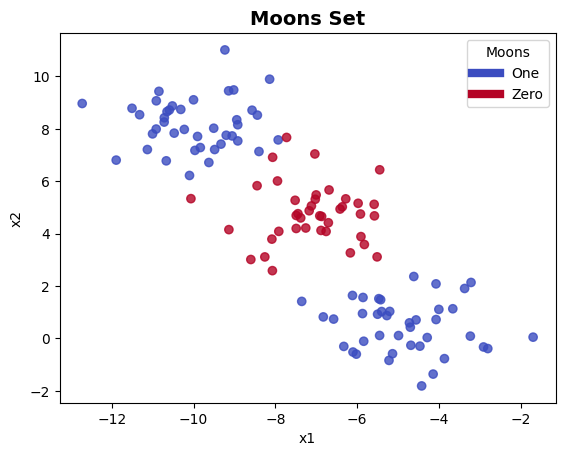

         x1        x2  y
0 -5.422578  1.477418  0
1 -5.270181  0.872708  0
2 -2.800484 -0.387307  0
3 -8.064956  6.915338  1
4 -6.111296  1.640534  0


In [70]:
from sklearn.datasets import make_moons, make_blobs
cmap_data = plt.cm.coolwarm

X, y = make_blobs(n_samples=120, n_features=2, random_state=12)
df = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})
df.y = df.y.replace(1,2)
df.y = df.y.replace(0,1)
df.y = df.y.replace(2,0)

plt.scatter(df.x1, df.x2, c=df.y, cmap=cmap_data, alpha=0.8)
plt.title('Moons Set',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['One', 'Zero'], loc='upper right',title='Moons')

plt.show()

print(df.head())

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['x1','x2']]
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = LogisticRegression(max_iter=1000)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( f'{clf.score(X_test,y_test):.2f}' )


[1 0 0 0 0 0 0 0 0 0] ...
0.69


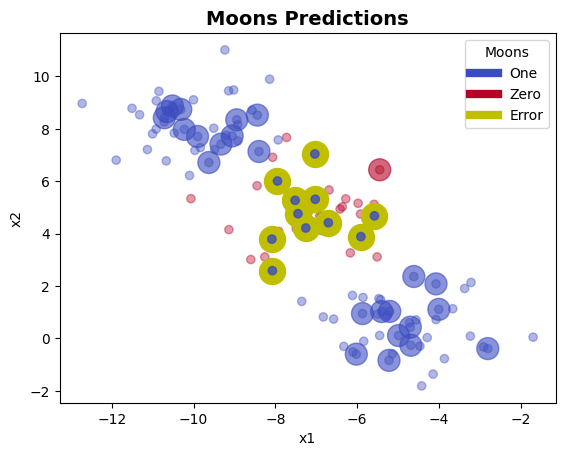

In [72]:
cmap_data = plt.cm.coolwarm

plt.scatter(X.x1, X.x2, c=y, cmap=cmap_data, alpha=0.4) # todos dados
plt.scatter(X_test.x1, X_test.x2, c=y_pred, s=250,cmap=cmap_data, alpha=0.6) # somente dados de teste

plt.scatter(X_test[y_pred != y_test].x1, X_test[y_pred != y_test].x2, color='y', s=350, alpha=1, label='wrong predictions')
plt.scatter(X_test[y_pred != y_test].x1, X_test[y_pred != y_test].x2, c=y_test[y_pred != y_test], cmap=cmap_data, alpha=0.8)
plt.title('Moons Predictions',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6),
                Line2D([0], [0], color='y', lw=6)]
plt.legend(custom_lines, ['One', 'Zero', 'Error'], loc='upper right',title='Moons')

plt.show()

> Esse resultado não parece muito bom: a regressão logística não consegue separar perfeitamente classes que não sejam linearmente separáveis!

O resultado de 0.69 não parece ruim à primeira vista. Mas bom ou ruim, a ideia é que esse resultado pode não estar distribuído uniformemente entre as classes, e você pode rever o último exemplo da aula anterior. Pode haver uma classe que tenha um resultado de classificação muito bom e outra um resultado muito ruim. Esse valor da acuracidade é um valor geral, média do resultado de todas as classes. Esse é apenas um dos resultados que podemos buscar com outras métricas de classificação.

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print('\nMatriz de Confusão:\n')
print(cm)

# O valor é o mesmo, só muda o método
accuracy = accuracy_score(y_test, y_pred)
print('\nScore de Acuracidade (1):\n')
print(f'{accuracy:.2f}')

accuracy = clf.score(X_test, y_test)
print('\nScore de Acuracidade (2):\n')
print(f'{accuracy:.2f}')

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))


Matriz de Confusão:

[[24  0]
 [11  1]]

Score de Acuracidade (1):

0.69

Score de Acuracidade (2):

0.69

Classification Report:

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        24
           1       1.00      0.08      0.15        12

    accuracy                           0.69        36
   macro avg       0.84      0.54      0.48        36
weighted avg       0.79      0.69      0.59        36



## Matriz de Confusão
A matriz de confusão é uma matriz que sumariza os resultados de acertos e erros do modelo para avaliar o desempenho da classificação. É uma matriz quadrada, $n \times n$  onde $n$ é o número de classes objetivo. Lembrando que avaliamos o modelo sobre os resultados no conjunto de teste, a matriz compara os valores reais (conjunto de teste) com aqueles estimados pelo modelo do mesmo modo que nossa tabela acima com a coluna `Igual?`, mas trazendo a informação de modo bastante mais sumarizado.

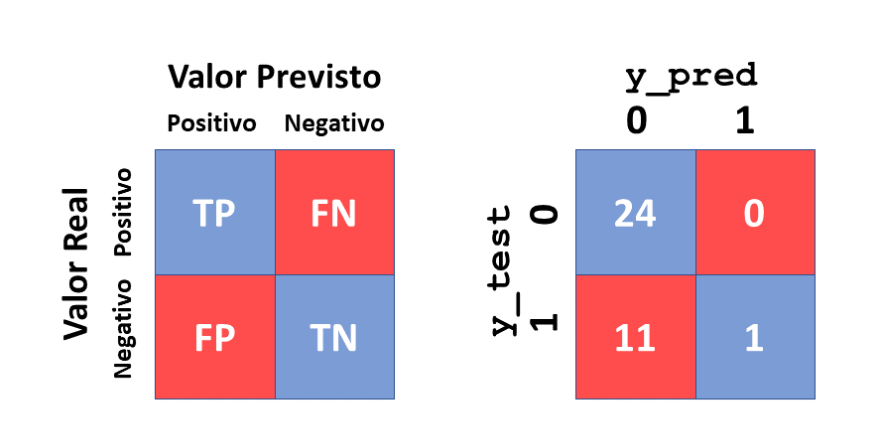

Dessa matriz saem todos os valores e métricas úteis para a análise dos resultados. Particularmente, interessam os valores:

* **Verdadeiro positivo (TP)**, em que valor previsto corresponde ao valor real, isto é o valor real era positivo e o modelo previu um valor positivo

* **Verdadeiro negativo (TN)**, em que o valor real era negativo e o modelo previu um valor negativo também corretamente

* **Falso Positivo (FP)**, Ou **Erro Tipo 1**, em que o valor real era negativo, mas o modelo previu um valor positivo. É o caso em que o modelo é **superestimado**, gerando falsos alarmes.

* **Falso negativo (FN)**, Ou **Erro tipo 2**, em que o valor real era positivo, mas o modelo previu um valor negativo. É o caso em que o modelo é **substimado**, gerando perda de casos positivos.


Esses valores já permitem você identificar que nosso modelo não tem a mesma eficiência para as duas classes.

Nosso modelo é superestimado, ele prevê muito mais casos positivos do que na realidade acontecem. Ele previu com sucesso 100% dos casos positivo, isto é, não há nenhum falso negativo ou *erro tipo 2*. Entretanto, sendo superestimado, produz um grande número (a maior parte, ou 11 em cada 12 casos) falsos positivos, ou *erro tipo 1*.

Por exemplo, se 0 (positivo) representa pacientes com diagnóstico positivo para uma doença, nosso detecta corretamente 100% dos casos da doença, mas gera um número muito grande de falsos positivos e não serviria, portanto, para ser empregado em um exame (embora o erro tipo 2, não detectar os casos positivos fosse, no caso de doenças ainda mais grave). Desse modo, você pode concluir que nosso modelo, que não parecia tão ruim à primeira vista, é de fato um modelo que não pode ser empregado.

## Acuracidade

Você já conhece essa métrica e apenas vamos verificar que, como outras métricas, ela pode ser obtida diretamente da matriz de confusão:

$$ Accuracy = \frac{TP+TN}{TP+FP+TN+FN} $$

Note que $TP+TN$ é a soma dos valores diagonais, ou o total de acertos, e $TP+FP+TN+FN$ é simplesmente a soma de todos valores, ou o total de casos.

$$ Accuracy = \frac{Total de Acertos}{Total de Casos} $$

In [74]:
cm = confusion_matrix(y_test, y_pred)
print('\nMatriz de Confusão:\n')
print(cm)

TP, FP, FN, TN = cm.T.ravel()
print('\nTP = ', TP, '\nFP = ', FP, '\nFN = ', FN, '\nTN = ', TN)


Matriz de Confusão:

[[24  0]
 [11  1]]

TP =  24 
FP =  11 
FN =  0 
TN =  1


In [75]:
Accuracy = (TP+TN)/(TP+FP+TN+FN)
print(f'{Accuracy:.2f}')

0.69


## Precisão e *Recall*

Outras duas métricas importante são a Precisão e o *Recall*,

$$ Precision = \frac{TP}{TP + FP} $$

e

$$ Recall = \frac{TP}{TP + FN} $$


Mas o que de fato essas métricas nos dizem? Você dificilmente irá guardar essas fórmulas. Mas é mais importante, e talvez até mais fácil, entender o conceito por trás dessas métricas o que já nos dá um modo direto de calcular os seus valores.

A Precisão é um valor que, dados todos elementos previstos uma classe, quantos foram previstos corretamente. Isto é, o percentual dos casos que de fato pertencem àquela classe. No nosso exemplo, 69% são de fato positivos e, portanto, 31% são valores FP.

O *Recall* (Revocação, ou Sensibilidade) por outro lado nos diz quantos casos de uma determinada classe foram corretamente previstos. E você pode pensar que precisamos fazer uma nova busca (*recall*) para os elementos da classe que ainda não foram identificados! No nosso exemplo, 100% dos casos positivos foram corretamente identificados.

In [76]:
Precision = TP/(TP + FP)
print(f'{Precision:.2f}')

0.69


In [77]:
Recall = TP/(TP + FN)
print(f'{Recall:.2f}')

1.00


## F1-Score
F1-score que pode ser entendido como uma média harmônica dos valores de precisão e recall:

$$ F1-score = \frac{2}{1/Recall + 1/Precision}$$

Na prática, quando tentamos aumentar a precisão do nosso modelo, o recall diminui e vice-versa. A pontuação F1 permite capturar ambas as tendências em um único valor e, por isso é bastante empregada sendo seu valor máximo quando a precisão e o recall são iguais.

In [78]:
F1_score = 2 / ( (1/Recall) + (1/Precision) )
print(f'{F1_score:.2f}')

0.81


## Classification Report
A maneira mais fácil de listar as métricas


In [79]:
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        24
           1       1.00      0.08      0.15        12

    accuracy                           0.69        36
   macro avg       0.84      0.54      0.48        36
weighted avg       0.79      0.69      0.59        36



Além das métricas que já discutimos você encontra os valores de suporte, que nada mais são que as quantidades de casos de cada classe. Esse valor é importante para identificarmos classes desbalanceadas e são empregados para o cálculo das médias ponderadas das métricas `weighted avg`. O `macro avg`, por outro lado, é apenas a média das métricas de todas as classes de dados.

## Análise

```
Matriz de Confusão:

[[921  10]
 [153  14]]

Score de Acuracidade (1):

0.85

Score de Acuracidade (2):

0.85

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       931
           1       0.58      0.08      0.15       167

    accuracy                           0.85      1098
   macro avg       0.72      0.54      0.53      1098
weighted avg       0.82      0.85      0.80      1098
```
Como você pode ver, apesar da acuracidade de  0.85  do nosso modelo, ele acerta apenas pouco mais que uma moeda ( 0.5  é são as chances de cara ou coroa),  0.56 , dos casos positivos de doença. Além disso apenas 0.08 dos casos de doença foram identificados pelo modelo. Esses dois valores se refletem também baixo F1-score médio desse modelo. Este é, portanto, um péssimo modelo se o objetivo é identificar pacientes em risco!

# K-Vizinhos Mais Próximos

O K-Vizinhos mais Próximos, ou Knn (do inglês, K nearest neighbors) é um dos modelos mais simples de classificação, mas também bastante empregado. Seu funcionamento se baseia em um princípio muito simples que nós mesmos adotamos frequentemente no dia a dia, nós, por exemplo, nos assemelhamos às pessoas mais próximas de nós. Assim, é razoável supor que podemos classificar uma instância de acordo com a classe de seus vizinhos mais próximos.

## Knn *by scratch*

O conceito do Knn é bastante simples o que permite implementar o algoritmo e verificar o seu funcionamento sem qualquer API ou pacote adicional. Basicamente o modelo consiste na execução de 3 passos:

1. Calcular as distâncias do elemento desejado para os demais
2. Encontrar os k-vizinhos mais próximos
3. Retornar a classe mais frequente entre dos k-vizinhos

In [80]:
loans = pd.DataFrame({'age':[25,35,45,20,35,52,23,40,60,48,33],
                      'loan':[40000,60000,80000,20000,120000,18000,95000,62000,100000,220000,150000],
                      'default':[1,1,1,1,1,1,0,0,0,0,0] }) # 1='yes'

case  = pd.DataFrame({'age':[47],'loan':[142000]})

display(loans)
display(case)

,age,loan,default
0,25,40000,1
1,35,60000,1
2,45,80000,1
3,20,20000,1
4,35,120000,1
5,52,18000,1
6,23,95000,0
7,40,62000,0
8,60,100000,0
9,48,220000,0


,age,loan
0,47,142000


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y)

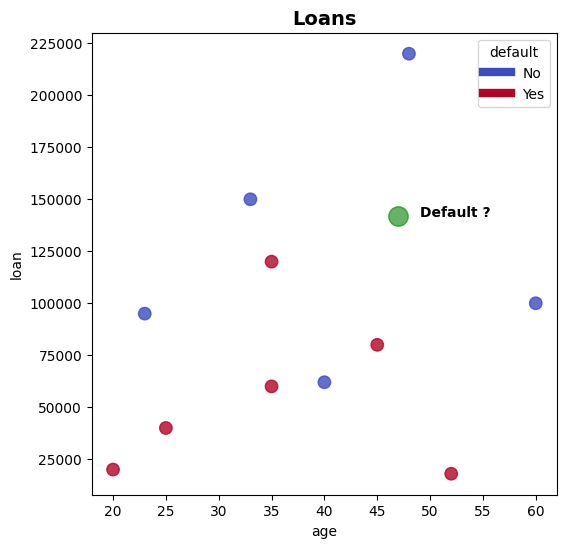

In [81]:
f, ax = plt.subplots(1,1,figsize=(6,6))
cmap_data = plt.cm.coolwarm

ax.scatter(loans.age, loans.loan, c=loans.default, cmap=cmap_data, alpha=0.8, s=80)
ax.plot(case.age, case.loan, 'go', markersize=14, alpha=0.6)

plt.text(case.age+2, case.loan,'Default ?', weight='bold')
plt.title('Loans',weight='bold',fontsize=14)
plt.xlabel("age")
plt.ylabel("loan")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['No', 'Yes'], loc='upper right',title='default')

plt.show()


In [96]:
from sklearn.metrics import DistanceMetric

dist = DistanceMetric.get_metric('euclidean')
d = dist.pairwise(loans[['age','loan']],case[['age','loan']])

loans['distance'] = d
display(loans.sort_values('distance'))

,age,loan,default,distance
10,33,150000,0,8000.012250
4,35,120000,1,22000.003273
8,60,100000,0,42000.002012
6,23,95000,0,47000.006128
2,45,80000,1,62000.000032
9,48,220000,0,78000.000006
7,40,62000,0,80000.000306
1,35,60000,1,82000.000878
0,25,40000,1,102000.002373
3,20,20000,1,122000.002988


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y)

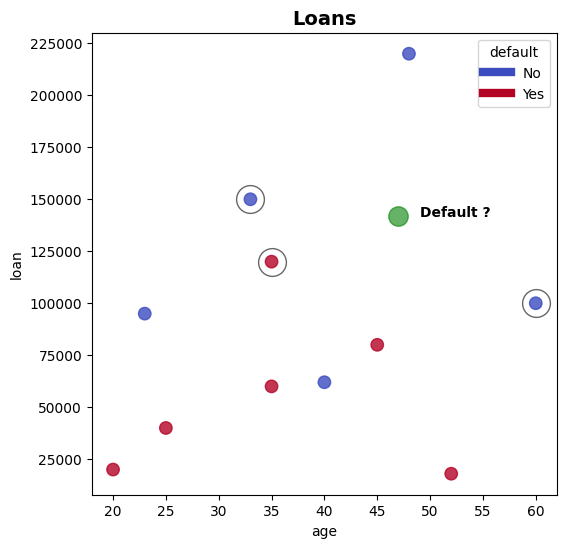

,age,loan,default,distance
10,33,150000,0,8000.012250
4,35,120000,1,22000.003273
8,60,100000,0,42000.002012


In [97]:
# 3 vizinhos mais próximos
k3_neighbors = loans.nsmallest(3,'distance')

f, ax = plt.subplots(1,1,figsize=(6,6))
cmap_data = plt.cm.coolwarm

ax.scatter(k3_neighbors.age, k3_neighbors.loan, edgecolors='k', c='w', alpha=0.6, s=400)
ax.scatter(loans.age, loans.loan, c=loans.default, cmap=cmap_data, alpha=0.8, s=80)
ax.plot(case.age, case.loan, 'go', markersize=14, alpha=0.6)

plt.text(case.age+2, case.loan,'Default ?', weight='bold')
plt.title('Loans',weight='bold',fontsize=14)
plt.xlabel("age")
plt.ylabel("loan")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['No', 'Yes'], loc='upper right',title='default')

plt.show()

display(k3_neighbors)

Com base nisso podemos estimar que a classe desse empréstimo é *Default No* (zeros) com probabilidade de $2/3$ e, portanto, deveríamos conceder o empréstimo.  

## Normalizando os dados
O cálculo de distâncias como medida de similaridade (menor distância indicando maior similaridade) pode, entretanto, apresentar grandes desvios quando empregamos variáveis ​com escalas muito diferentes ou variáveis ​​numéricas e categóricas em conjunto.

Veja que no nosso exemplo os valores dos empréstimos encontram-se em uma escala de valores $1000$ vezes maior que a idade e, por isso, idade teve pouca ou nenhuma influência nas distâncias e poderíamos ter o mesmo resultado empregando somente o os valores dos empréstimos.

> **Vários modelos de aprendizado de máquina são baseados em distância como medida de similaridade e são, portanto, *sensíveis* à normalização dos dados e devemos aplicá-la quando empregados dados em diferentes escalas.**


Você pode simplesmente empregar uma função `minmax_scale` do `scikit-learn` para fazer a normalização e existem outras funções para os demais tipos de normalização.

É melhor empregarmos um *estimador* do `scikit-learn`. O cálculo é o mesmo da função `minmaxscaler`, mas o uso de um estimador permite salvarmos os parâmetros empregados para a mesma aplicação em outros conjuntos de dados.

> *Na normalização de dados com o `scikit-learn` é preferível uso de estimadores no lugar de funções para que a mesma transformação possa ser efetuada em outros conjuntos de dados. O mesmo princípio se aplica a outras transformações, como os encodes.*

In [98]:
# apenas mostrando o resultado do estimador
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
print(scaler.fit(loans[['age','loan']]))

print(scaler.data_max_)

print(scaler.transform(loans[['age','loan']]))
print(scaler.transform(case))

MinMaxScaler()
[6.0e+01 2.2e+05]
[[0.125      0.10891089]
 [0.375      0.20792079]
 [0.625      0.30693069]
 [0.         0.00990099]
 [0.375      0.5049505 ]
 [0.8        0.        ]
 [0.075      0.38118812]
 [0.5        0.21782178]
 [1.         0.40594059]
 [0.7        1.        ]
 [0.325      0.65346535]]
[[0.675      0.61386139]]


In [99]:
# criando os dados normalizados, 'scaled'
loans_scaled = pd.DataFrame(scaler.transform(loans[['age','loan']]),columns=loans.columns[0:2])
loans_scaled = pd.concat([loans_scaled,loans[['default']]],axis=1)
display(loans_scaled)

case_scaled = pd.DataFrame(scaler.transform(case),columns=case.columns[0:2])
display(case_scaled)

,age,loan,default
0,0.125,0.108911,1
1,0.375,0.207921,1
2,0.625,0.306931,1
3,0.000,0.009901,1
4,0.375,0.504950,1
5,0.800,0.000000,1
6,0.075,0.381188,0
7,0.500,0.217822,0
8,1.000,0.405941,0
9,0.700,1.000000,0


,age,loan
0,0.675,0.613861


Podemos agora refazer o cálculo das distância empregando os dados normalizados e identificar os k-vizinhos mais próximos e a classe mais frenquente dentre eles.

/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:2041: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self._mtx[0, 2] += tx
/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:2042: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self._mtx[1, 2] += ty
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
/usr/local/lib/pytho

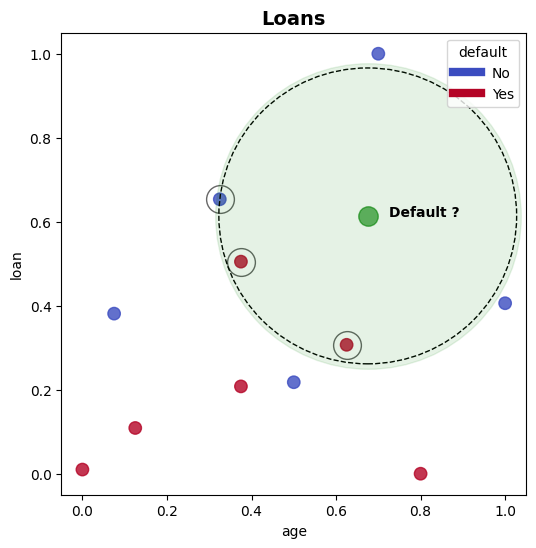

,age,loan,default,distance
2,0.625,0.306931,1,0.310977
4,0.375,0.504950,1,0.319158
10,0.325,0.653465,0,0.352234


In [100]:
dist = DistanceMetric.get_metric('euclidean')
d = dist.pairwise(loans_scaled[['age','loan']],case_scaled[['age','loan']])

loans_scaled['distance'] = d

k3_neighbors_scaled = loans_scaled.nsmallest(3,'distance')

f, ax = plt.subplots(1,1,figsize=(6,6))
cmap_data = plt.cm.coolwarm

ax.plot(case_scaled.age, case_scaled.loan, 'go', markersize=220, alpha=0.10)
ax.scatter(k3_neighbors_scaled.age, k3_neighbors_scaled.loan, edgecolors='k', c='w', alpha=0.6, s=400)
ax.scatter(loans_scaled.age, loans_scaled.loan, c=loans_scaled.default, cmap=cmap_data, alpha=0.8, s=80)
ax.plot(case_scaled.age, case_scaled.loan, 'go', markersize=14, alpha=0.6)

a_circle = plt.Circle((case_scaled.age, case_scaled.loan), k3_neighbors_scaled.distance.max(), edgecolor='k', linestyle='dashed',fill=False)
ax.add_artist(a_circle)

plt.text(case_scaled.age+0.05, case_scaled.loan,'Default ?', weight='bold')
plt.title('Loans',weight='bold',fontsize=14)
plt.xlabel("age")
plt.ylabel("loan")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['No', 'Yes'], loc='upper right',title='default')

plt.show()

display(k3_neighbors_scaled)

Como você pode ver o resultado agora é outro e a classe prevista do empréstimo será *Default Yes* (zeros), com probabilidade de $2/3$ e, portanto, não deveríamos conceder esse empréstimo.  

## Knn `scikit-learn`

Vamos empregar agora o estimador `KNeighborsClassifier` do `scikit-learn` para o mesmo problema acima. O modo de uso do estimador é o mesmo que empregamos para o classificador logístico e será empregado em todos os demais modelos supervisionados que iremos implementar.

In [103]:
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler

X = loans[['age','loan']]
y = loans.default

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
case_scaled = scaler.transform(case)

# K = 3 (3 vizinhos mais próximos)
clf = neighbors.KNeighborsClassifier(n_neighbors = 3)

clf.fit(X, y)

y_pred = clf.predict(case_scaled)
print('y_pred: ', y_pred)

default_pred = ['No','Yes'][y_pred[0]]
print('Default? ', default_pred)

y_pred:  [1]
Default?  Yes


## Aplicando Knn

In [105]:
# Dados
df = pd.read_csv('https://raw.githubusercontent.com/TarekDib03/Analytics/master/Week3%20-%20Logistic%20Regression/Data/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [106]:
# Removendo os ausentes
print('Before',len(df))
df = df.dropna()
print('After',len(df))

Before 4240
After 3658


In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = df.drop(columns=['TenYearCHD']) # Remove somente a coluna que será o "y"
# Aplicando a normalização
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
y = df.TenYearCHD

# Separação dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

# 3 vizinhos mais próximos
clf = KNeighborsClassifier(n_neighbors = 3)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( f'{clf.score(X_test,y_test):.2f}' )

[0 0 1 0 0 0 0 0 1 0] ...
0.82


In [110]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Avaliação dos dados
cm = confusion_matrix(y_test, y_pred)
print('\nMatriz de Confusão:\n')
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print('\nScore de Acuracidade (1):\n')
print(f'{accuracy:.2f}')

accuracy = clf.score(X_test, y_test)
print('\nScore de Acuracidade (2):\n')
print(f'{accuracy:.2f}')

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))


Matriz de Confusão:

[[865  66]
 [136  31]]

Score de Acuracidade (1):

0.82

Score de Acuracidade (2):

0.82

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       931
           1       0.32      0.19      0.23       167

    accuracy                           0.82      1098
   macro avg       0.59      0.56      0.57      1098
weighted avg       0.78      0.82      0.79      1098



### Análise

Embora com uma acuracidade um pouco menor que a obtida no modelo logístico o modelo de K-Vizinhos, com k=3, apresenta um resultado mais balanceado entre as classes e poderíamos sugerir empregar este modelo como um modelo mais adequado.

### Predição de Novos Casos

Se considerarmos 0.82 um bom resultado, esse é um bom modelo e podemos então aplicá-lo  para novos casos do mesmo modo que fizemos antes com o classificador logístico (aula anterior). Por exemplo, podemos fazer predição para pacientes homens e mulheres hipotéticos em que todos os indicadores estejam no percentil 0.75.

> **Você deve notar agora que, como fizemos uma transformação dos dados das variáveis preditoras precisamos aplicar esta mesma transformação (a normalização!) nos valores dos novos casos. Como empregamos um estimador `scaler`, podemos empregar essa mesma transformação e você pode notar também que, se não tivéssemos empregado um estimador, não saberíamos como aplicar a mesma transformação! Essa a vantagem de empregarmos um estimador para isso!**

In [111]:
X_new = pd.DataFrame( df.drop(columns=['TenYearCHD']).groupby('male').quantile(0.75) ).reset_index()

X_new = scaler.transform(X_new)
X_new

array([[0.        , 0.63157895, 0.66666667, 1.        , 0.14285714,
        0.        , 0.        , 1.        , 0.        , 0.31827515,
        0.29550827, 0.43386243, 0.2949588 , 0.41414141, 0.1299435 ],
       [1.        , 0.63157895, 0.66666667, 1.        , 0.28571429,
        0.        , 0.        , 1.        , 0.        , 0.29979466,
        0.27186761, 0.44444444, 0.30925836, 0.36363636, 0.13276836]])

In [112]:
clf.predict(X_new)

array([0, 0])

Como no modelo logístico esses pacientes não apresentam risco segundo nosso modelo e você pode verificar outros percentis, como o percentil 0.9 em que já estimamos o risco para pacientes do sexo masculino.

In [114]:
X_new = pd.DataFrame( df.drop(columns=['TenYearCHD']).groupby('male').quantile(0.90) ).reset_index()

X_new = scaler.transform(X_new)
clf.predict(X_new)

array([0, 1])

## Métricas de Distância

Para medir a distância entre vetores característicos, os elementos mais próximos, empregamos até aqui a distância Euclidiana. Ela é a distância mais comum, mas existem várias funções distância que podem ser aplicadas, não só aqui, mas também em outros modelos (*knn*, *kmeans* etc.). Embora a distância euclidiana pareça ser a mais aplicada, outras funções distância encontram mais uso em contextos específicos como a distância de **Hamming** para dados binários e cadeias de strings ou a distância **Cosseno** para análise de dados de linguagem natural, textos e documentos.

**Algumas funções distância comuns**

Distância Euclidiana $\qquad \qquad \qquad \qquad \qquad \qquad$ ${\displaystyle \| ab \| _ {2} = {\sqrt {\sum _ {i} (a_ {i} -b_ {i}) ^ {2}}}}$

Distância Euclidiana Quadrática $\qquad \qquad \qquad \qquad$  ${\displaystyle \| ab \| _ {2} ^ {2} = \sum _ {i} (a_ {i} -b_ {i}) ^ {2}} $

Distância de Manhattan $\qquad \qquad \qquad\qquad \qquad$ ${\displaystyle \| ab \| _ {1} = \sum _ {i} | a_ {i} -b_ {i} |}$

Distância Máxima $\qquad \qquad \qquad \qquad \qquad\qquad$  ${\displaystyle \| ab \| _ {\infty} = \max _ {i} | a_ {i} -b_ {i} |}$

Distância Minkowski $\qquad \qquad \qquad \qquad \qquad \qquad$ ${\displaystyle \| ab \| _ {Minkowski} = {(\sum _ {i} |a_ {i} -b_ {i}| ^ {p}})^{\frac{1}{p}}}$


### Distância de Hamming para Strings

A distância de Hamming tem aplicação para cadeias de símbolos de mesmo comprimento e, por exemplo, pode ser empregada para medir a distância entre cadeias de DNA.


In [115]:
def hamming_distance(string1, string2):
	dist_counter = 0
	for n in range(len(string1)):
		if string1[n] != string2[n]:
			dist_counter += 1
	return dist_counter

hamming_distance('ACGTACGT','ACGTTACG')

4

In [116]:
def hamming_distance2(string1, string2):
  return sum(xi != yi for xi, yi in zip(string1, string2))

hamming_distance2('ACGTACGT','ACGTTACG')

4

### Distância Cosseno

A Distância Cosseno encontra aplicação no tratamento de  textos em que os textos têm uma representação vetorial baseada na frequência dos termos (ou palavras) como as representações *bow*, *tf-idf* etc. Ela mede o ângulo formado pelos vetores e a distância de dois vetores $a$ e $b$ pode ser obtida a partir da expressão:

$$ a b^t  = \|a\| \|b\| cos(\theta)$$

Definimos a *similaridade* de dois vetores como:

$$ similarity(a,b) = cos(\theta) = \frac{a b^t }{\|a\| \|b\|} = \frac{ \sum\limits_{i=1}^{n}{a_i  b_i} }{ \sqrt{\sum\limits_{i=1}^{n}{a_i^2}}  \sqrt{\sum\limits_{i=1}^{n}{b_i^2}} }$$

E a distância:

$$ distance(a,b) = 1 - similarity(a,b)$$

# Pre-Processing


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [118]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Dentre outras operações sobre os dados podemos destacar:

0. Discretização*
1. Imputação de Valores Ausentes
2. Encoding Variáveis Categóricas
3. Normalização


### Etapas de Pre-Processing
- Imputação de Valores Ausentes
- Encoding Variáveis Categóricas
- Persistindo o Estimador
- Aplicando em um modelo ML
- Classificação (Hot Encode)
- Normalização

> A ordem pode variar conforme a necessidade

## Normalização

1. **Min-Max Scaling**

$$
X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

ou

$$
X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}} \times (\text{range}_{max} - \text{range}_{min}) + \text{range}_{min}
$$

- $X$: valor original.
- $X_{min}$: valor mínimo da variável.
- $X_{max}$: valor máximo da variável.
- $\text{range}_{min}$: limite inferior do intervalo de normalização, por padrão 0.
- $\text{range}_{max}$: limite superior do intervalo de normalização, por padrão 1.

2. **Standard Scaling (Z-Score Normalization)**

$$
X_{scaled} = \frac{X - \mu}{\sigma}
$$

- $X$: valor original.
- $\mu$: média da variável.
- $\sigma$: desvio padrão da variável.

3. **MaxAbs Scaling**

$$
X_{scaled} = \frac{X}{|X_{max}|}
$$

- $X$: valor original.
- $X_{max}$: valor absoluto máximo da variável.

4. **Robust Scaling**

$$
X_{scaled} = \frac{X - \text{median}}{IQR}
$$

- $X$: valor original.
- $\text{median}$: mediana da variável.
- $IQR$: intervalo interquartil (75º percentil - 25º percentil).

5. **Normalizer (Norma L2)**

$$
X_{scaled} = \frac{X}{\|X\|}
$$

- $X$: vetor original.
- $\|X\|$: norma L2 (comprimento) do vetor $X$.

In [119]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [120]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Cria os scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

# Aplica os scalers
df_min_max = pd.DataFrame(min_max_scaler.fit_transform(df[['housing_median_age', 'total_bedrooms', 'households']]),
                         columns=['housing_median_age', 'total_bedrooms', 'households'])
df_scale = pd.DataFrame(standard_scaler.fit_transform(df[['housing_median_age', 'total_bedrooms', 'households']]),
                        columns=['housing_median_age', 'total_bedrooms', 'households'])
df_robust = pd.DataFrame(robust_scaler.fit_transform(df[['housing_median_age', 'total_bedrooms', 'households']]),
                         columns=['housing_median_age', 'total_bedrooms', 'households'])

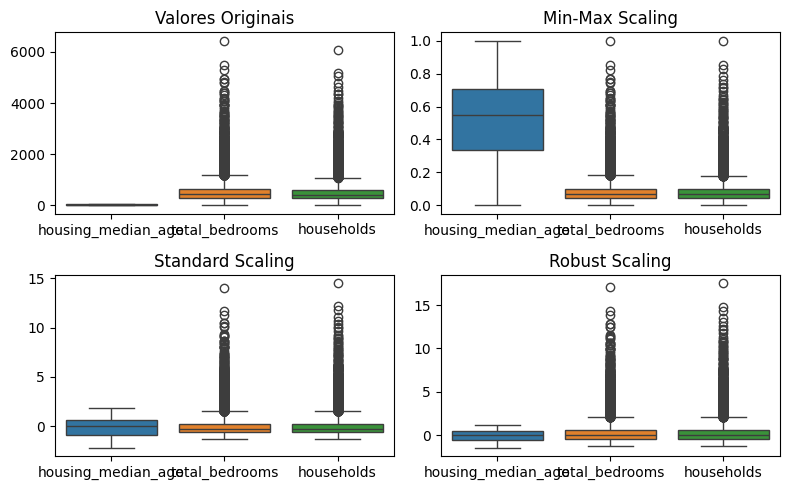

In [121]:
fig, axes = plt.subplots(2, 2, figsize=(8,5))

# Boxplot dos valores originais
sns.boxplot(data=df[['housing_median_age', 'total_bedrooms', 'households']], ax=axes[0, 0])
axes[0, 0].set_title('Valores Originais')

# Boxplot dos valores após Min-Max Scaling
sns.boxplot(data=df_min_max, ax=axes[0, 1])
axes[0, 1].set_title('Min-Max Scaling')

# Boxplot dos valores após Standard Scaling
sns.boxplot(data=df_scale, ax=axes[1, 0])
axes[1, 0].set_title('Standard Scaling')

# Boxplot dos valores após Robust Scaling
sns.boxplot(data=df_robust, ax=axes[1, 1])
axes[1, 1].set_title('Robust Scaling')

plt.tight_layout()
plt.show()


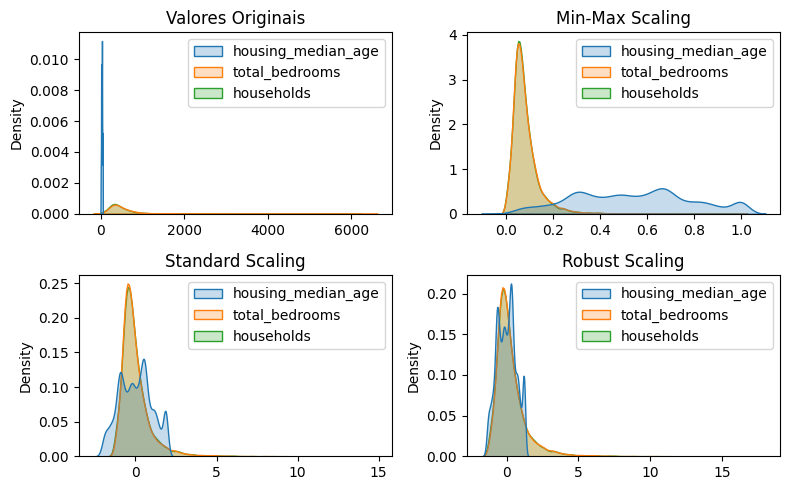

In [122]:
fig, axes = plt.subplots(2, 2, figsize=(8,5))

# Densidade dos valores originais
sns.kdeplot(data=df[['housing_median_age', 'total_bedrooms', 'households']], ax=axes[0, 0], fill=True)
axes[0, 0].set_title('Valores Originais')

# Densidade dos valores após Min-Max Scaling
sns.kdeplot(data=df_min_max, ax=axes[0, 1], fill=True)
axes[0, 1].set_title('Min-Max Scaling')

# Densidade dos valores após Standard Scaling
sns.kdeplot(data=df_scale, ax=axes[1, 0], fill=True)
axes[1, 0].set_title('Standard Scaling')

# Densidade dos valores após Robust Scaling
sns.kdeplot(data=df_robust, ax=axes[1, 1], fill=True)
axes[1, 1].set_title('Robust Scaling')

plt.tight_layout()
plt.show()

### Quando e qual normalização empregar?

> **Preciso normalizar?**
> 1. Quanto menos interferirmos (quanto menos *botamos a mão*) nos dados, melhor
> 2. Nem todos algoritmos empregam os valores e/ou distância e, portanto, a normalização pode não ser necessária
> 3. A preparação dos dados pode envolver outras etapas que podem influenciar no tipo de normalização, como a exclusão de outliers

> **Decidi por normalizar. Que algoritmo empregar?**
> 1. Nenhum algoritmo é *melhor* a priori (ou só teríamos um :-))
> 2. Dependem de muitos fatores como dos dados (outliers, distribuição, valores mínimos e máximos etc.), do modelo de aprendizado e tarefa a ser realizado, função distância empregada etc. também não há uma concordância dos autores sobre técnicas de normalização e modelos a empregar. O melhor, portanto, é experimentar os diferentes métodos e resultados.

De qualquer modo, o Min-Max Scaling é útil para algoritmos sensíveis à escala dos dados e que empregam distância. O Standard Scaling é mais adequado para algoritmos que assumem uma distribuição normal dos dados. Mas ambos são bastante sensíveis a outliers. O Robust Scaling é ideal quando há muitos outliers nos dados, e o Normalizer é mais comum em tarefas de aprendizado não supervisionado, como clustering.

## Na prática

Na prática, os métodos mais comuns empregados são o **Min-Max Scaling** e o **Standard Scaling**.

### Aplicando Estimadores de Normalização

In [126]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [128]:
# Remove ausentes
df = df.dropna().reset_index(drop=True)

# Hot Enconding das variáveis categóricas
from sklearn.preprocessing import OneHotEncoder

# Cria o OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)

# Aplica o OneHotEncoder nas colunas categóricas
encoder.fit(df[['island', 'sex', 'species']])
encoded_data = encoder.transform(df[['island', 'sex', 'species']])

# encoded_data = encoder.fit_transform(df[['island', 'sex', 'species']])

df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

df_encoded = pd.concat([df.drop(['island', 'sex', 'species'], axis=1), df_encoded], axis=1) # take care! concat axis=1 segue os índices!
df_encoded.head()

# Persistindo o Estimador
import joblib

# Salvando o modelo
joblib.dump(encoder, 'encoder.pkl')

# Recuperando modelo
encoder = joblib.load('encoder.pkl')
encoder.get_feature_names_out()

array(['island_Dream', 'island_Torgersen', 'sex_Male',
       'species_Chinstrap', 'species_Gentoo'], dtype=object)

In [129]:
df_encoded = df_encoded.drop(columns=['species_Chinstrap','species_Gentoo'])
df_encoded = pd.concat([df[['species']], df_encoded], axis=1)
df_encoded.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male
0,Adelie,39.1,18.7,181.0,3750.0,0.0,1.0,1.0
1,Adelie,39.5,17.4,186.0,3800.0,0.0,1.0,0.0
2,Adelie,40.3,18.0,195.0,3250.0,0.0,1.0,0.0
3,Adelie,36.7,19.3,193.0,3450.0,0.0,1.0,0.0
4,Adelie,39.3,20.6,190.0,3650.0,0.0,1.0,1.0


In [130]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

standard_scaler = StandardScaler()

df_scaled = pd.DataFrame(standard_scaler.fit_transform(df_encoded.drop(columns='species')),
                         columns=df_encoded.drop(columns='species').columns)

df_scaled = pd.concat([df_encoded['species'], df_scaled], axis=1)
df_scaled.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male
0,Adelie,-0.896042,0.780732,-1.426752,-0.568475,-0.76532,2.466801,0.991031
1,Adelie,-0.822788,0.119584,-1.069474,-0.506286,-0.76532,2.466801,-1.009050
2,Adelie,-0.676280,0.424729,-0.426373,-1.190361,-0.76532,2.466801,-1.009050
3,Adelie,-1.335566,1.085877,-0.569284,-0.941606,-0.76532,2.466801,-1.009050
4,Adelie,-0.859415,1.747026,-0.783651,-0.692852,-0.76532,2.466801,0.991031


In [131]:
df_scaled.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male
count,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02
mean,3.840772e-16,6.401286e-16,2.133762e-16,-1.707010e-16,1.066881e-16,-8.535048e-17,7.201447e-17
std,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00
min,-2.177987e+00,-2.067291e+00,-2.069852e+00,-1.874435e+00,-7.653197e-01,-4.053834e-01,-1.009050e+00
25%,-8.227879e-01,-7.958519e-01,-7.836512e-01,-8.172292e-01,-7.653197e-01,-4.053834e-01,-1.009050e+00
50%,9.288742e-02,6.872642e-02,-2.834620e-01,-1.953432e-01,-7.653197e-01,-4.053834e-01,9.910312e-01
75%,8.437412e-01,7.807321e-01,8.598276e-01,7.063915e-01,1.306643e+00,-4.053834e-01,9.910312e-01
max,2.858227e+00,2.204743e+00,2.146028e+00,2.603144e+00,1.306643e+00,2.466801e+00,9.910312e-01


#### Classificação


In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

X = df_scaled.drop(columns=['species'])
y = df_scaled['species']

# model = LogisticRegression(max_iter=10000)
model = KNeighborsClassifier()

model.fit(X, y)

print("Score (Accurancy): ", model.score(X, y))

Score (Accurancy):  0.996996996996997


In [133]:
# Predição
X_new = df_scaled.iloc[[5,9]].drop(columns=['species']) # Tente df_encoded, estaria correto???
display(X_new.head())
print()
print('Predictions: ', model.predict(X_new))

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male
5,-0.932669,0.323014,-1.426752,-0.723946,-0.76532,2.466801,-1.009050
9,-1.720150,2.001313,-0.212006,0.239977,-0.76532,2.466801,0.991031



Predictions:  ['Adelie' 'Adelie']


#### Linear Regression


In [134]:
X = df_scaled.drop(columns=['body_mass_g','species'])
y = df_scaled['body_mass_g']

model = LinearRegression()
model.fit(X, y)

print("Score (R2): ", model.score(X, y))

Score (R2):  0.8392957568284216


In [135]:
X_new = df_encoded.iloc[[5,9]].drop(columns=['body_mass_g','species'])
display(X_new.head())
print()
print('Predictions: ', model.predict(X_new))

,bill_length_mm,bill_depth_mm,flipper_length_mm,island_Dream,island_Torgersen,sex_Male
5,38.9,17.8,181.0,0.0,1.0,0.0
9,34.6,21.1,198.0,0.0,1.0,1.0



Predictions:  [106.23700969 116.00149496]


#### Inverse Transform!

In [136]:
X_new['body_mass_g'] = model.predict(X_new)

X_new_unscaled = pd.DataFrame(standard_scaler.inverse_transform(X_new),
                         columns=X_new.columns)
X_new_unscaled.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,island_Dream,island_Torgersen,sex_Male,body_mass_g
0,256.404335,52.164585,2734.008531,4207.057057,0.852003,0.141141,53.620854
1,232.924396,58.653298,2971.918512,4207.057057,0.852003,0.489308,58.502898


# Exercício de métricas

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

path_data = 'https://github.com/Rogerio-mack/Temporal/raw/main/Data/'


Empregue o `scikit-learn` para criar os seguintes modelos:

Um **Modelo de Regressão Logística** e outro de **K-vizinhos mais Próximos** para a partir das medidas de sépalas e pétalas estimar a espécie da flor.

* Empregue uma separação de conjunto de dados de treinamento e teste com 50% de dados de teste estratificados pelo atributo alvo. Defina o `random_state=1` para reprodutibilidade dos resultados. *Nota: em geral empregamos conjuntos menores de teste, 25-30%, mas aqui o conjunto é pequeno e queremos garantir o propósito de gerar diferentes predições.*

* Experimente diferentes valores de K, como 1,2,3,4,5,6,7 e compare as métricas de cada modelo e o da regressão logística.

* Faça então a estimativa da espécie para flores que apresentam medidas correspondentes aos quartis (Q1 e Q3) das medidas de pétalas e sépalas empregando o melhor modelo.


In [138]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

# Entradas e Saídas
X = iris.drop(columns='species')
y = iris['species']

# Separação dos Conjuntos de Treinamento e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=1)

# Definição do Modelo
clf = LogisticRegression(max_iter=1000)
# clf = KNeighborsClassifier(n_neighbors = 1)

# Treinamento
clf.fit(X_train,y_train)

# Predição
y_pred = clf.predict(X_test)

# Métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print('\nMatriz de Confusão:\n')
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print('\nScore de Acuracidade (1):\n')
print(f'{accuracy:.4f}')

print('\n', clf)

accuracy = clf.score(X_test, y_test)
print('\nScore de Acuracidade (2):\n')
print(f'{accuracy:.4f}')

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))


Matriz de Confusão:

[[25  0  0]
 [ 0 25  0]
 [ 0  1 24]]

Score de Acuracidade (1):

0.9867

 LogisticRegression(max_iter=1000)

Score de Acuracidade (2):

0.9867

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.96      1.00      0.98        25
   virginica       1.00      0.96      0.98        25

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

# Entradas e Saídas
X = iris.drop(columns='species')
y = iris['species']

# Separação dos Conjuntos de Treinamento e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=1)

# Definição do Modelo
# clf = LogisticRegression(max_iter=1000)
clf = KNeighborsClassifier(n_neighbors = 1)

# Treinamento
clf.fit(X_train,y_train)

# Predição
y_pred = clf.predict(X_test)

# Métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print('\nMatriz de Confusão:\n')
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print('\nScore de Acuracidade (1):\n')
print(f'{accuracy:.4f}')

print('\n', clf)

accuracy = clf.score(X_test, y_test)
print('\nScore de Acuracidade (2):\n')
print(f'{accuracy:.4f}')

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))


Matriz de Confusão:

[[25  0  0]
 [ 0 24  1]
 [ 0  1 24]]

Score de Acuracidade (1):

0.9733

 KNeighborsClassifier(n_neighbors=1)

Score de Acuracidade (2):

0.9733

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.96      0.96      0.96        25
   virginica       0.96      0.96      0.96        25

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75



## Interpretando as Métricas
**REGRESSÃO LINEAR**

* **Acuracidade**: 0.99 (0.9867) = *1 erro de classificação do total de 75, 74/75*

* **Precisão (Versicolor)**: 0.96 = *1 classificado falsamente como versicolor do total de 25 corretamente classificados como versicolor, 25/26*

* **Recall (Versicolor)**: 1.00 = *Todos os casos versicolor classificados corretamente, 25/25*

*Macro avg e weighted avg*, médias simples e ponderadas (pelo support) de todas as classes.

## Melhor Modelo

* São empregadas uma ou mais métricas de eficiência nos modelos, como acuracidade, precisão, revocação e F1-score.
* Entre modelos de mesma eficiência, opta-se pelo modelo mais simples com menor número de hipóteses (**Princípio da [Navalha de Ockham](https://pt.wikipedia.org/wiki/Navalha_de_Ockham)**, ou também **Princípio da Parcimônia** ou da Economia).

### Comparação dos modelos
### LogisticRegression(max_iter=1000)

```
Score de Acuracidade (2):

0.9867

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.96      1.00      0.98        25
   virginica       1.00      0.96      0.98        25

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

```
### KNeighborsClassifier(n_neighbors=1)

```
Score de Acuracidade (2):

0.9733

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.96      0.96      0.96        25
   virginica       0.96      0.96      0.96        25

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75
```

### KNeighborsClassifier(n_neighbors=2)

```
Score de Acuracidade (2):

0.9600

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.92      0.96      0.94        25
   virginica       0.96      0.92      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75
```

### KNeighborsClassifier(n_neighbors=3,4,5,6,7)
```
Score de Acuracidade (2):

0.9600

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.96      0.92      0.94        25
   virginica       0.92      0.96      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

```

## Predição

In [142]:
X_new = iris.drop(columns='species').quantile([0.25,0.75])
X_new

,sepal_length,sepal_width,petal_length,petal_width
0.25,5.1,2.8,1.6,0.3
0.75,6.4,3.3,5.1,1.8


In [143]:
# Predição
y_pred = clf.predict(X_new)
y_pred

array(['setosa', 'versicolor'], dtype=object)

In [144]:
X_new['y_pred'] = y_pred
X_new

,sepal_length,sepal_width,petal_length,petal_width,y_pred
0.25,5.1,2.8,1.6,0.3,setosa
0.75,6.4,3.3,5.1,1.8,versicolor
